## Let's create some Bar Plots!

In this notebook, we'll create data visualisations, in the form of bar plots, for the walkability scores of Inner Melbourne's SA3 regions and SA2 suburbs. 

A secondary purpose of this notebook is to be an introduction to basic Python, the _pandas_ data analytics library and _matplotlib_.

We start with importing the libraries and tools we'll need for the rest of the notebook.

In [51]:
#We don't use seaborn in this particular notebook, but it makes matplotlib charts look nicer.
import seaborn as sns 

#Pandas for data analysis
import pandas as pd
from pandas import Series,DataFrame

#To display the figures in the notebook itself.
%matplotlib inline

The results for the _Walkability Workflow_ process from AURIN are stored in the innermelbourne.csv file. We can open it using pandas and load its contents in a pandas dataframe object. 

In [44]:
#Importing the walkability data file for Inner Melbourne. 
dframe = pd.read_csv('data/innermelbourne.csv')
dframe.columns = dframe.columns.str.strip() #Stripping white-spaces off of column names. 

#Displaying the Dataframe.
dframe

,sa1_main11,sa1_7dig11,sa2_5dig11,sa2_name11,sa3_code11,sa3_name11,sa4_code11,sa4_name11,gcc_code11,gcc_name11,...,LUM_Industrial,LUM_Commercial,LUM_Parkland,LUM_Education,LandUseMixMeasure,AverageDensity,Connectivity_ZScore,AverageDensity_ZScore,LandUseMixMeasure_ZScore,SumZScore
0,20602111008,2111008,21110,Alphington - Fairfield,20602,Darebin - South,206,Melbourne - Inner,2GMEL,Greater Melbourne,...,21855.529104,0.000000,0.000000,0.000000,0.209642,38.126245,-1.089897,-0.608101,-0.639684,-2.337682
1,20604112615,2112615,21126,Southbank,20604,Melbourne City,206,Melbourne - Inner,2GMEL,Greater Melbourne,...,90046.798515,71836.844799,0.000000,13341.245830,0.771248,530.953591,1.708208,6.698707,2.031466,10.438381
2,20601110506,2110506,21105,Brunswick,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,...,4251.295867,16508.824406,0.000000,0.000000,0.283073,50.611851,0.019669,-0.422985,-0.290425,-0.693741
3,20606113726,2113726,21137,South Yarra - East,20606,Stonnington - West,206,Melbourne - Inner,2GMEL,Greater Melbourne,...,0.000000,28299.009787,455.782559,0.000000,0.249847,73.256862,1.076313,-0.087244,-0.448455,0.540615
4,20606113730,2113730,21137,South Yarra - East,20606,Stonnington - West,206,Melbourne - Inner,2GMEL,Greater Melbourne,...,0.000000,66634.245431,7683.452945,472.115493,0.528749,103.160862,1.054106,0.356122,0.878074,2.288302
5,20606113731,2113731,21137,South Yarra - East,20606,Stonnington - West,206,Melbourne - Inner,2GMEL,Greater Melbourne,...,0.000000,18128.866818,2078.318812,8608.302765,0.407831,79.368598,0.647023,0.003371,0.302957,0.953352
6,20606113801,2113801,21138,Toorak,20606,Stonnington - West,206,Melbourne - Inner,2GMEL,Greater Melbourne,...,0.000000,32383.988070,0.000000,0.000000,0.278916,54.811069,0.624556,-0.360726,-0.310199,-0.046369
7,20606113802,2113802,21138,Toorak,20606,Stonnington - West,206,Melbourne - Inner,2GMEL,Greater Melbourne,...,0.000000,10369.847354,4845.605825,0.000000,0.279052,57.936518,0.341692,-0.314388,-0.309552,-0.282247
8,20606113803,2113803,21138,Toorak,20606,Stonnington - West,206,Melbourne - Inner,2GMEL,Greater Melbourne,...,0.000000,0.000000,3825.156012,4658.626881,0.145798,50.671513,0.259470,-0.422101,-0.943341,-1.105971
9,20606113804,2113804,21138,Toorak,20606,Stonnington - West,206,Melbourne - Inner,2GMEL,Greater Melbourne,...,0.000000,0.000000,0.000000,6941.239433,0.156664,32.748246,-0.619184,-0.687837,-0.891660,-2.198682


In the output cell above, you can see how the data is laid out (hurray for iPython Notebooks!). 

But we don't need most of the columns above, for what we'll be doing. So lets drop them.

In [45]:
#Dropping columns deemed irrelevant
aframe = dframe.drop(['gcc_name11','gcc_code11','sa2_5dig11','sa1_7dig11','sa3_code11','sa4_code11','ste_code11','ste_name11'],axis=1)

Now, a step that we do in every other notebook in this project: aggregating SA1 results into their respective SA2s, SA3s, or even SA4s when required.

In [46]:
#Group by SA2 suburb
avg_sa2 = aframe[['sa2_name11','SumZScore']].groupby('sa2_name11').mean().round(3)

#Group by SA3 area
avg_sa3 = aframe[['sa3_name11','SumZScore']].groupby('sa3_name11').mean().round(3)

In the code above, speaking in terms of SA3 aggregation, we choose the data that we require (SA3 Names, and their SumZScores), aggregate them on the basis of SA3 Names (attribute: sa3_name11) by taking the mean of the SA1s belonging to a particular SA3, and round out the results to 3 decimal places, all in one line.

Here's what a resulting, aggregated SA3 dataframe looks like: 

In [47]:
avg_sa3

,SumZScore
sa3_name11,
Brunswick - Coburg,-1.442
Darebin - South,-1.705
Essendon,-1.501
Melbourne City,2.551
Port Phillip,0.257
Stonnington - West,0.054
Yarra,0.447


The results for SA2 aggregation are in a similar format, but are not displayed here. 

In [48]:
#Changing the column name from SumZScore to Walkability Index, for better readability.
avg_sa3.columns=['Walkability Index']
avg_sa2.columns= ['Walkability Index']

The SA2 and SA3 dataframes now have only the Walkability Indices. 

Now we can begin to prepare a visual for the indices. We'll begin with doing one for Inner Melbourne SA3s. Before plotting the data, we sort the results in a descending order for a nicer visualization.

After sorting the regions/suburbs based on the walkability scores, a plot object is created. It’s important to customize the figure properly, that is, to give it appropriate X/Y axis labels, fix the layout, captions, manipulate the legend positioning if needed.


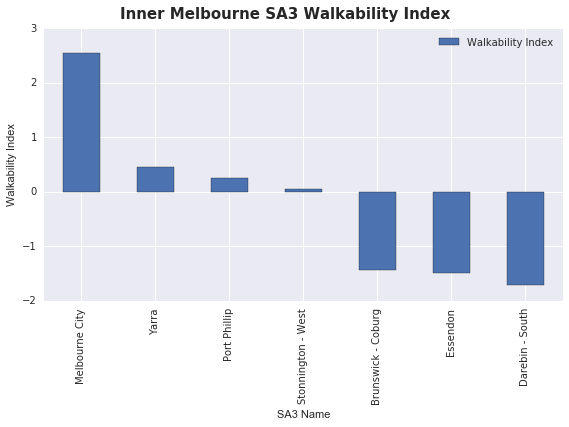

In [49]:
#Code below is related to plotting the dataframe, and then customizing it using matplotlib.
sa3_bars = avg_sa3.sort_values('Walkability Index',ascending=False).plot(kind='bar',figsize=(8,6)) #Creating and matplotlib object
sa3_bars.set_ylabel('Walkability Index') #Setting the Y label
sa3_bars.set_xlabel('SA3 Name') #Setting the X label
sa3_fig = sa3_bars.get_figure() #Assigning the figure to a new variable for further operations
sa3_fig.tight_layout() #To fit everything in the saved image
sa3_fig.subplots_adjust(top=0.93) #Adjusting the dimensions of the plot. 
sa3_fig.suptitle('Inner Melbourne SA3 Walkability Index',fontsize=15,fontweight='bold') #Title for the figure
sa3_fig.savefig("figures/sa3_bars.png") #Saving the resulting figure as a .png image.

The code for doing this for SA2s is similar.

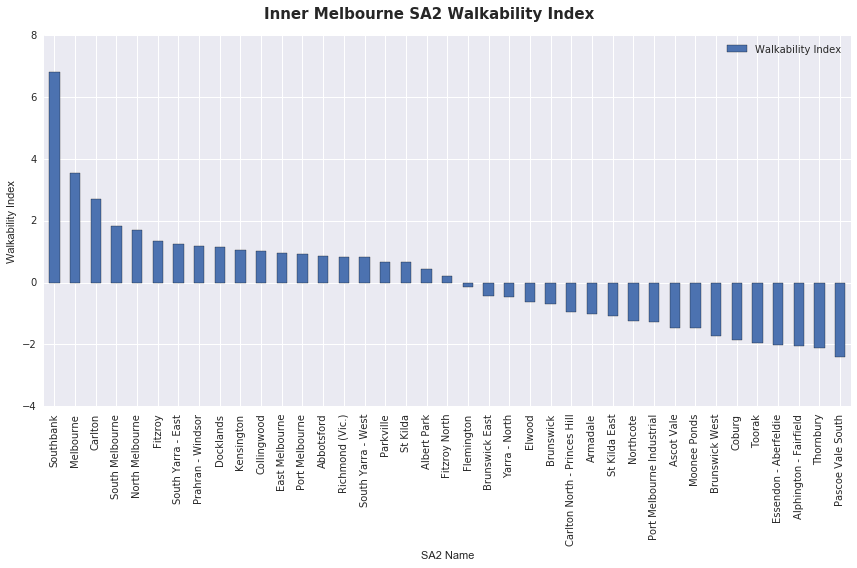

In [50]:
sa2_bars = avg_sa2.sort_values('Walkability Index',ascending=False).plot(kind='bar',figsize=(12,8))
sa2_bars.set_ylabel('Walkability Index')
sa2_bars.set_xlabel('SA2 Name')
sa2_fig = sa2_bars.get_figure()
sa2_fig.tight_layout()
sa2_fig.subplots_adjust(top=0.93)
sa2_fig.suptitle('Inner Melbourne SA2 Walkability Index',fontsize=15,fontweight='bold')
sa2_fig.savefig("figures/sa2_bars.png")

And we're done! People who've visited Melbourne might generally agree with the _walkability_ of the suburbs above, with Southbank and Melbourne City being the highlights.